<img src="./img/Circuit.png" style="width: 50%; height: 50%"> </img>

In [5]:
0.03*1264

37.92

$$ CPE_{x} = \frac{1}{Q_x(\imath\omega)^{p_x}}, \ x=H, M, L, E $$

$$ R(\omega) = R_{\infty}+\sum_{x=H, M, L, E}\frac{1}{\frac{1}{R_x}+\frac{1}{CPE_x(\omega)}}$$

$$ R(\omega) = R_{\infty}+\sum_{x=M, L}\frac{1}{\frac{1}{R_x}+\frac{1}{CPE_x(\omega)}}$$

- H: High frequency
- M: Middle (possibly 

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 16 days


In [7]:
import pandas as pd

In [8]:
data = pd.read_excel("../data/Kimberlite-2015-07-17.xls")

In [9]:
data_active = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["0LabID (PCG)", "Facies", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Rh","Qh","Ph","Rm","Qm","Pm","Rl","Ql","Pl","Re","Qe","Pe-f","Pe-i"]]

In [10]:
data_active

,0LabID (PCG),Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Sat Geometric Dens [g/cc],Chargeability [ms],...,Rm,Qm,Pm,Rl,Ql,Pl,Re,Qe,Pe-f,Pe-i
3,NT01202,VK,K1P-0240,NaN,NaN,111.6,0.000642,38.183914,2.221620,0.5439,...,1,1.26,0.498,602.3,3.2e-06,0.665,10000000000,0.002534,0.2067,-2.121
5,NT01203,VK,K1P-0531,NaN,NaN,87.5,0.000603,13501.390421,2.545503,0.6497,...,1,1.26,0.498,185300,5.433e-08,0.433,10000000000,9.698e-06,0.2674,0.03658
7,NT01204,HK,K1P-0535,NaN,NaN,135.1,0.013182,10090.413234,2.674294,45.6,...,1,1.26,0.498,578400,7.246e-07,0.177,10000000000,0.0001862,0.4612,0.752
9,NT01205,HK,K1P-0540,NaN,NaN,163.8,0.006001,2204.463074,2.759935,18.31,...,1,1.26,0.498,47360,8.84e-06,0.1809,10000000000,0.007566,0.4576,0.7399
15,NT01208,VK,K1P-0589,64.326044,-109.812725,78.0,0.000628,48.916840,2.099668,0.2669,...,1,1.265,0.5055,762.8,2.624e-06,0.6791,10000000000,0.0009501,0.5222,1.534
16,NT01208,VK,K1P-0589,64.326044,-109.812725,78.0,NaN,49.965791,2.084449,NaN,...,1,1.265,0.5055,706.7,4.353e-06,0.6424,10000000000,0.002632,0.231,1.847
17,NT01209,VK,K1P-0590,64.326044,-109.812725,85.9,0.000766,187.757995,2.403881,0.7856,...,1,1.265,0.5055,2247,6.04e-06,0.5753,10000000000,0.0008284,0.2171,-2.034
18,NT01209,VK,K1P-0590,64.326044,-109.812725,85.9,0.000782,66.229958,2.296125,0.2139,...,1,1.265,0.5055,1064,1.697e-06,0.7258,10000000000,0.0005173,0.4395,-2.239
19,NT01210,HK,K1P-0591,64.326044,-109.812725,122.4,0.001167,47.798493,2.385503,0.9152,...,1,1.265,0.5055,395,4.273e-05,0.4269,10000000000,0.001293,0.9516,0.7104
21,NT01211,HK,K1P-0593,64.326044,-109.812725,135.4,0.004224,17612.473012,2.608411,5.453,...,1,1.265,0.5055,216600,5.428e-07,0.2842,10000000000,5.736e-05,0.941,1.935


In [11]:
PK = data.loc[np.logical_and((data['Facies'] == 'PK'), data.notnull()['Rinf']==True)][["0LabID (PCG)", "Facies", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Rm","Qm","Pm","Rl","Ql","Pl"]]
HK = data.loc[np.logical_and((data['Facies'] == 'HK'), data.notnull()['Rinf']==True)][["0LabID (PCG)", "Facies", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Rm","Qm","Pm","Rl","Ql","Pl"]]

In [12]:
HK

,0LabID (PCG),Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Sat Geometric Dens [g/cc],Chargeability [ms],Rinf,Rm,Qm,Pm,Rl,Ql,Pl
7,NT01204,HK,K1P-0535,NaN,NaN,135.1,0.013182,10090.413234,2.674294,45.6,67.74,1,1.26,0.498,578400,7.246e-07,0.177
9,NT01205,HK,K1P-0540,NaN,NaN,163.8,0.006001,2204.463074,2.759935,18.31,78.71,1,1.26,0.498,47360,8.84e-06,0.1809
19,NT01210,HK,K1P-0591,64.326044,-109.812725,122.4,0.001167,47.798493,2.385503,0.9152,11.7,1,1.265,0.5055,395,4.273e-05,0.4269
21,NT01211,HK,K1P-0593,64.326044,-109.812725,135.4,0.004224,17612.473012,2.608411,5.453,24.91,1,1.265,0.5055,216600,5.428e-07,0.2842
23,NT01212,HK,K1P-0595,64.326044,-109.812725,176.6,0.009333,572.919007,2.644475,12.95,27.21,1,1.265,0.5055,7429,0.0001171,0.1597


In [13]:
PK

,0LabID (PCG),Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Sat Geometric Dens [g/cc],Chargeability [ms],Rinf,Rm,Qm,Pm,Rl,Ql,Pl
25,NT01213,PK,K1P-0807,64.327019,-109.814587,92,0.000504,90.160425,2.245943,0.7187,16.11,1,1.265,0.5055,2.075,0.02219,0.4117
33,NT01217,PK,K1P-0825,64.325336,-109.817348,157,0.000272,20.391961,2.244102,0.4752,29.34,1,1.262,0.5,347.6,5.092e-06,0.6585


In [27]:
def CPEfun(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + Qx*(np.pi*2*freq*1j)**px)
    return out
def CPEfunElec(Rx, Qx, pex, pix, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + (1j)**pix*Qx*(np.pi*2*freq)**pex)
    return out
def CPEfunSeries(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = Rx + 1./(Qx*(np.pi*2*freq*1j)**px)
    return out

f0peak = lambda R, Q, P: (R*Q)**(-1./P)/np.pi/2.
taupeak = lambda R, Q, P: (R*Q)**(1./P)

In [28]:
def TKCColeColeElec(frequency, PID, data):
    Rh, Qh, Ph = data[data["Peregrine ID"]==PID]['Rh'].values[0], data[data["Peregrine ID"]==PID]['Qh'].values[0], data[data["Peregrine ID"]==PID]['Ph'].values[0]
    Rm, Qm, Pm = data[data["Peregrine ID"]==PID]['Rm'].values[0], data[data["Peregrine ID"]==PID]['Qm'].values[0], data[data["Peregrine ID"]==PID]['Pm'].values[0]
    Rl, Ql, Pl = data[data["Peregrine ID"]==PID]['Rl'].values[0], data[data["Peregrine ID"]==PID]['Ql'].values[0], data[data["Peregrine ID"]==PID]['Pl'].values[0]                                                         
    Re, Qe, Pe_f, Pe_i = data[data["Peregrine ID"]==PID]['Re'].values[0], data[data["Peregrine ID"]==PID]['Qe'].values[0], data[data["Peregrine ID"]==PID]['Pe-f'].values[0],data[data["Peregrine ID"]==PID]['Pe-i'].values[0]                                              
    rhoinf = data[data["Peregrine ID"]==PID]['Rinf'].values[0]
    fpeakm = f0peak(Rm, Qm, Pm)
    fpeakl = f0peak(Rl, Ql, Pl)
    rhoh = CPEfun(Rh, Qh, Ph, frequency)
    rhom = CPEfun(Rm, Qm, Pm, frequency)
    rhol = CPEfun(Rl, Ql, Pl, frequency)
    rhoe = CPEfunElec(Re, Qe, Pe_f, Pe_i, frequency)    
    rho = rhoh+rhom+rhol+rhoinf+rhoe               
    m =  (rho.real[0]-rho.real[-1])/rho.real[0]    
    fig, ax = plt.subplots(3, 2, figsize = (15, 9))
    ax[2,0].semilogx(frequency, rho.real, 'k-', lw=2)
    ax[0,0].semilogx(frequency, rhom.real+rhoinf, 'b-', lw=2)
    ax[1,0].semilogx(frequency, rhol.real+rhoinf, 'g-', lw=2)

    ax2 = ax[0,0].twinx()
    ax3 = ax[1,0].twinx()
    ax4 = ax[2,0].twinx()
    
    ax4.semilogx(frequency, (rho.imag), 'k--', lw=2)
    ax2.semilogx(frequency, (rhom.imag), 'b--', lw=2)
    ax3.semilogx(frequency, (rhol.imag), 'g--', lw=2)

    ax2.semilogx(np.r_[fpeakm, fpeakm], np.r_[rhom.imag.min(), rhom.imag.max()], 'b', lw=2)
    ax3.semilogx(np.r_[fpeakl, fpeakl], np.r_[rhol.imag.min(), rhol.imag.max()], 'g', lw=2)

    ax2.invert_yaxis()
    ax3.invert_yaxis()
    ax4.invert_yaxis()
    ax[0,0].grid(True)
    ax[1,0].grid(True)
    ax[2,0].grid(True)    
    ax[2,1].plot(rho.real, rho.imag, 'k-')
    ax[0,1].plot((rhom+rhoinf).real, (rhom+rhoinf).imag, 'b-')
    ax[1,1].plot((rhol+rhoinf).real, (rhol+rhoinf).imag, 'g-')
#     ax[2,0].plot(temp[:,0], temp[:,4], 'k.')
#     ax[2,1].plot(temp[:,4], temp[:,5], 'k.')
#     ax4.plot(temp[:,0], temp[:,5], 'k.')
    
    ax[0,1].invert_yaxis()
    ax[0,1].grid(True)
    ax[1,1].invert_yaxis()
    ax[1,1].grid(True)    
    ax[2,1].invert_yaxis()
    ax[2,1].grid(True)    
    
#     print data[data["0LabID (PCG)"]==PID]['Facies'].values[0], PID
    print data[data["Peregrine ID"]==PID]['Facies'].values[0], PID
    print "Rinf = ", rhoinf
    print "Chargeability = ", m    
    print "Taum = ", 1./fpeakm                  
    print "Taul = ", 1./fpeakl                            
    return 

In [29]:
PK

,0LabID (PCG),Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Sat Geometric Dens [g/cc],Chargeability [ms],Rinf,Rm,Qm,Pm,Rl,Ql,Pl
25,NT01213,PK,K1P-0807,64.327019,-109.814587,92,0.000504,90.160425,2.245943,0.7187,16.11,1,1.265,0.5055,2.075,0.02219,0.4117
33,NT01217,PK,K1P-0825,64.325336,-109.817348,157,0.000272,20.391961,2.244102,0.4752,29.34,1,1.262,0.5,347.6,5.092e-06,0.6585


In [30]:
# frequency = np.logspace(-2, 6, 211)
# TKCColeColeElec(frequency, "K1P-0825", data_active)

PK K1P-0807
Rinf =  16.11
Chargeability =  0.779142640096
Taum =  10.0032095108
Taul =  0.00355709604452


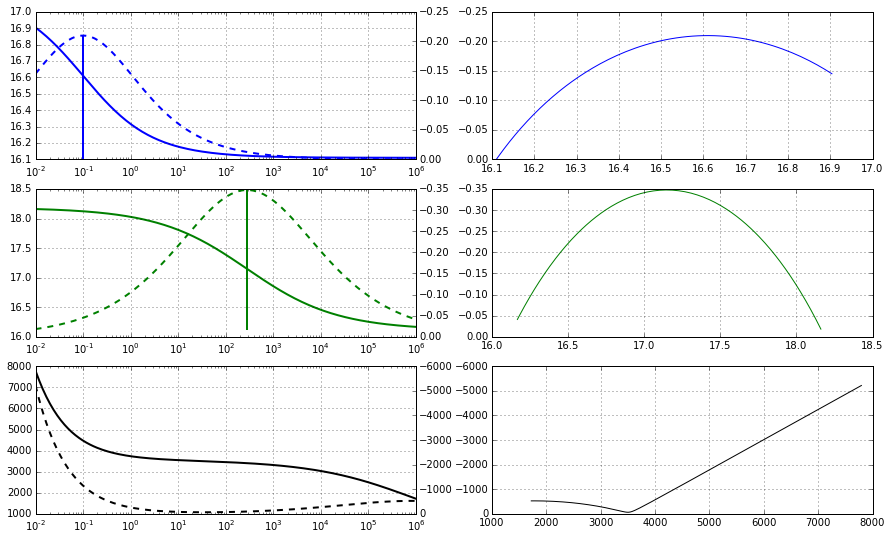

In [31]:
frequency = np.logspace(-2, 6, 211)
TKCColeColeElec(frequency, "K1P-0807", data_active)

XVK K2P-0017
Rinf =  14.04
Chargeability =  0.609207073999
Taum =  10.0068773804
Taul =  0.000274911963031


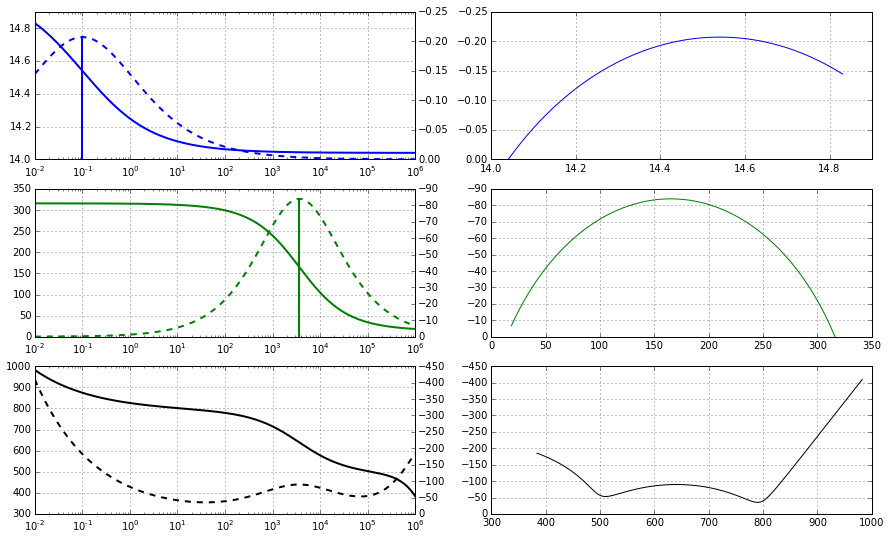

In [32]:
frequency = np.logspace(-2, 6, 211)
TKCColeColeElec(frequency, "K2P-0017", data_active)

In [39]:
def TKCColeCole(frequency, PID, data):
    Rm, Qm, Pm = data[data["Peregrine ID"]==PID]['Rm'].values[0], data[data["Peregrine ID"]==PID]['Qm'].values[0], data[data["Peregrine ID"]==PID]['Pm'].values[0]
    Rl, Ql, Pl = data[data["Peregrine ID"]==PID]['Rl'].values[0], data[data["Peregrine ID"]==PID]['Ql'].values[0], data[data["Peregrine ID"]==PID]['Pl'].values[0]                                                         
    rhoinf = data[data["Peregrine ID"]==PID]['Rinf'].values[0]
    fpeakm = f0peak(Rm, Qm, Pm)
    fpeakl = f0peak(Rl, Ql, Pl)
    rhom = CPEfun(Rm, Qm, Pm, frequency)
    rhol = CPEfun(Rl, Ql, Pl, frequency)
    rho = rhom+rhol+rhoinf                  
    m =  (rho.real[0]-rho.real[-1])/rho.real[0]    
    fig, ax = plt.subplots(3, 2, figsize = (15, 9))
    ax[2,0].semilogx(frequency, rho.real, 'k-', lw=2)
    ax[0,0].semilogx(frequency, rhom.real+rhoinf, 'b-', lw=2)
    ax[1,0].semilogx(frequency, rhol.real+rhoinf, 'g-', lw=2)

    ax2 = ax[0,0].twinx()
    ax3 = ax[1,0].twinx()
    ax4 = ax[2,0].twinx()
    
    ax4.semilogx(frequency, (rho.imag), 'k--', lw=2)
    ax2.semilogx(frequency, (rhom.imag), 'b--', lw=2)
    ax3.semilogx(frequency, (rhol.imag), 'g--', lw=2)

    ax2.semilogx(np.r_[fpeakm, fpeakm], np.r_[rhom.imag.min(), rhom.imag.max()], 'b', lw=2)
    ax3.semilogx(np.r_[fpeakl, fpeakl], np.r_[rhol.imag.min(), rhol.imag.max()], 'g', lw=2)

    ax2.invert_yaxis()
    ax3.invert_yaxis()
    ax4.invert_yaxis()
    ax[0,0].grid(True)
    ax[1,0].grid(True)
    ax[2,0].grid(True)    
    ax[2,1].plot(rho.real, rho.imag, 'k-')
    ax[0,1].plot((rhom+rhoinf).real, (rhom+rhoinf).imag, 'b-')
    ax[1,1].plot((rhol+rhoinf).real, (rhol+rhoinf).imag, 'g-')

    ax[0,1].invert_yaxis()
    ax[0,1].grid(True)
    ax[1,1].invert_yaxis()
    ax[1,1].grid(True)    
    ax[2,1].invert_yaxis()
    ax[2,1].grid(True)    
    
    print data[data["Peregrine ID"]==PID]['Facies'].values[0], PID
    print "Rinf = ", rhoinf
    print "Chargeability = ", m    
    print "Taum = ", 1./fpeakm                  
    print "Taul = ", 1./fpeakl                            
    return 

In [40]:
RlHK = data_active[data_active['Facies']=='HK']["Rl"].values[:]
QlHK = data_active[data_active['Facies']=='HK']["Ql"].values[:]
PlHK = data_active[data_active['Facies']=='HK']["Pl"].values[:]
fpeakHK = f0peak(RlHK, QlHK, PlHK)

In [41]:
RlPK = data_active[data_active['Facies']=='PK']["Rl"].values[:]
QlPK = data_active[data_active['Facies']=='PK']["Ql"].values[:]
PlPK = data_active[data_active['Facies']=='PK']["Pl"].values[:]
fpeakPK = f0peak(RlPK, QlPK, PlPK)

In [42]:
RlXVK = data_active[data_active['Facies']=='XVK']["Rl"].values[:]
QlXVK = data_active[data_active['Facies']=='XVK']["Ql"].values[:]
PlXVK = data_active[data_active['Facies']=='XVK']["Pl"].values[:]
fpeakXVK = f0peak(RlXVK, QlXVK, PlXVK)

In [43]:
RlVK = data_active[data_active['Facies']=='VK']["Rl"].values[:]
QlVK = data_active[data_active['Facies']=='VK']["Ql"].values[:]
PlVK = data_active[data_active['Facies']=='VK']["Pl"].values[:]
fpeakVK = f0peak(RlVK, QlVK, PlVK)

HK K1P-0535
Rinf =  67.74
Chargeability =  0.841321351254
Taum =  9.99371931703
Taul =  0.0461776603197


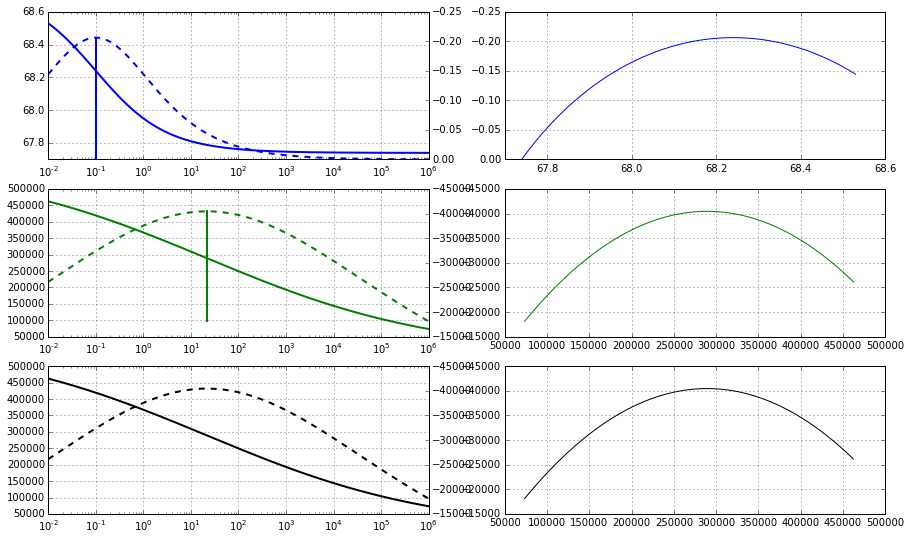

In [44]:
TKCColeCole(frequency, "K1P-0535", data_active)

HK K1P-0540
Rinf =  78.71
Chargeability =  0.848444911099
Taum =  9.99371931703
Taul =  0.0510358796732


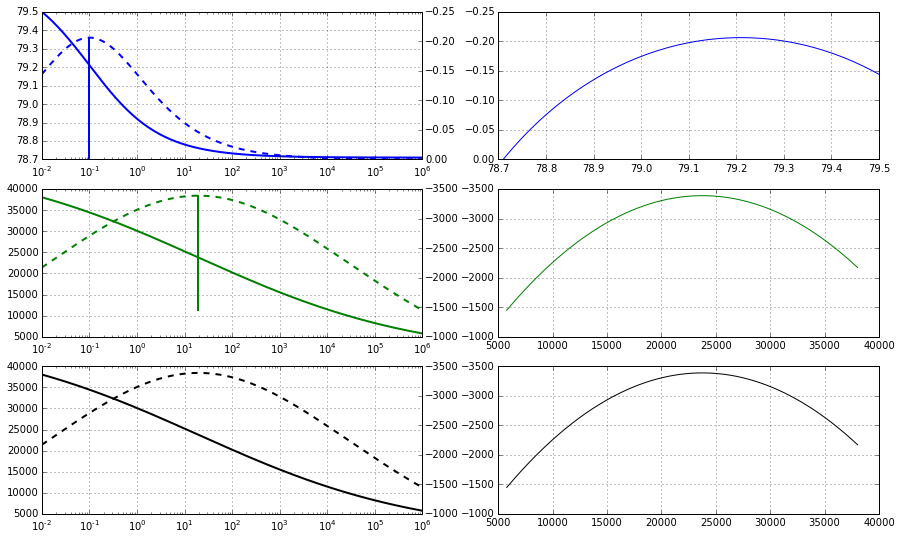

In [45]:
TKCColeCole(frequency, "K1P-0540", data_active)

HK K1P-0591
Rinf =  11.7
Chargeability =  0.915950924072
Taum =  10.0032095108
Taul =  0.000442339156975


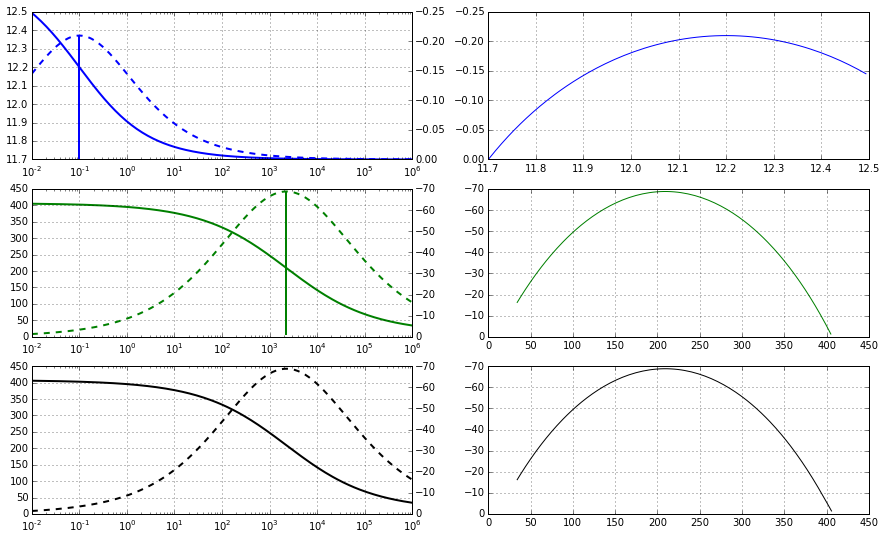

In [47]:
TKCColeCole(frequency, "K1P-0591", data_active)

HK K1P-0593
Rinf =  24.91
Chargeability =  0.912050800142
Taum =  10.0032095108
Taul =  0.00336423272081


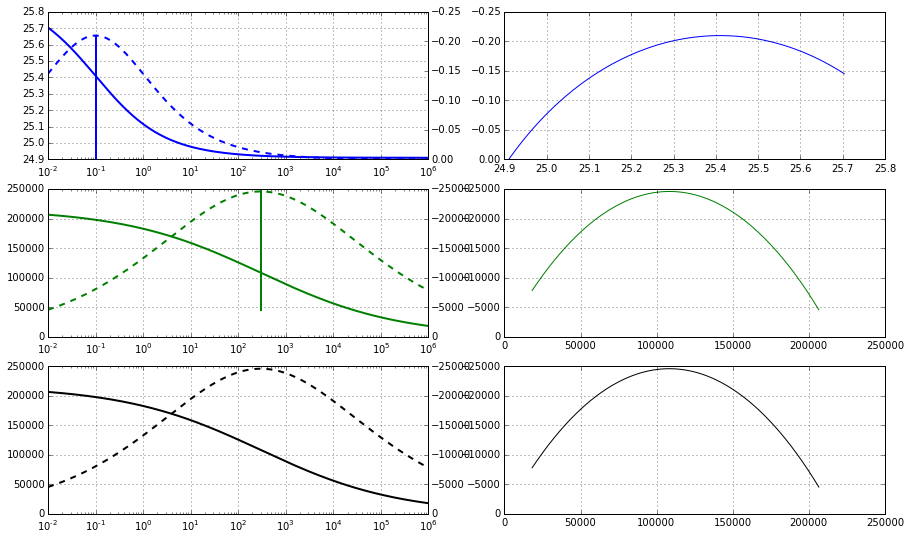

In [48]:
TKCColeCole(frequency, "K1P-0593", data_active)

HK K1P-0595
Rinf =  27.21
Chargeability =  0.86426718525
Taum =  10.0032095108
Taul =  2.62581869697


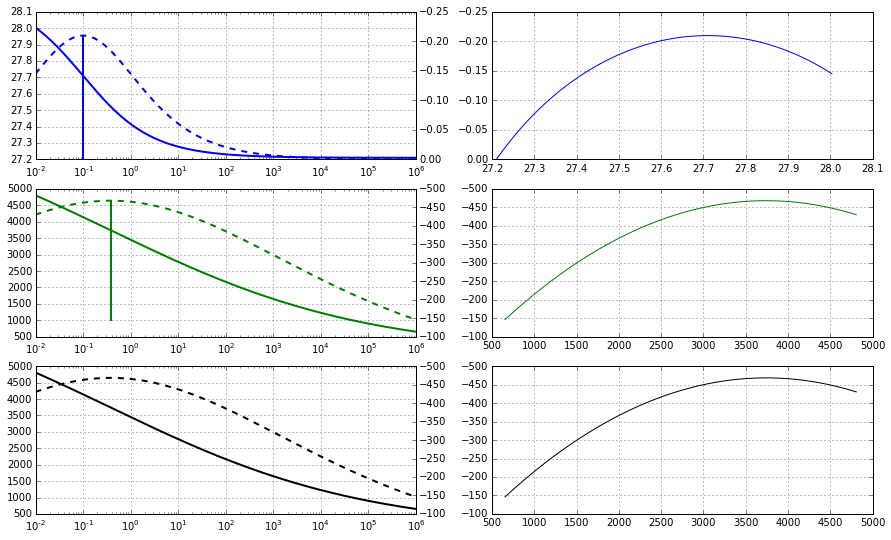

In [50]:
TKCColeCole(frequency, "K1P-0595", data_active)

In [51]:
data_active[data_active['Facies']=='PK']

,0LabID (PCG),Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Sat Geometric Dens [g/cc],Chargeability [ms],...,Rm,Qm,Pm,Rl,Ql,Pl,Re,Qe,Pe-f,Pe-i
25,NT01213,PK,K1P-0807,64.327019,-109.814587,92,0.000504,90.160425,2.245943,0.7187,...,1,1.265,0.5055,2.075,0.02219,0.4117,10000000000,0.0009194,0.6584,0.5648
33,NT01217,PK,K1P-0825,64.325336,-109.817348,157,0.000272,20.391961,2.244102,0.4752,...,1,1.262,0.5,347.6,5.092e-06,0.6585,10000000000,0.01008,0.2251,0.7095


PK K1P-0807
Rinf =  16.11
Chargeability =  0.14708619381
Taum =  10.0032095108
Taul =  0.00355709604452


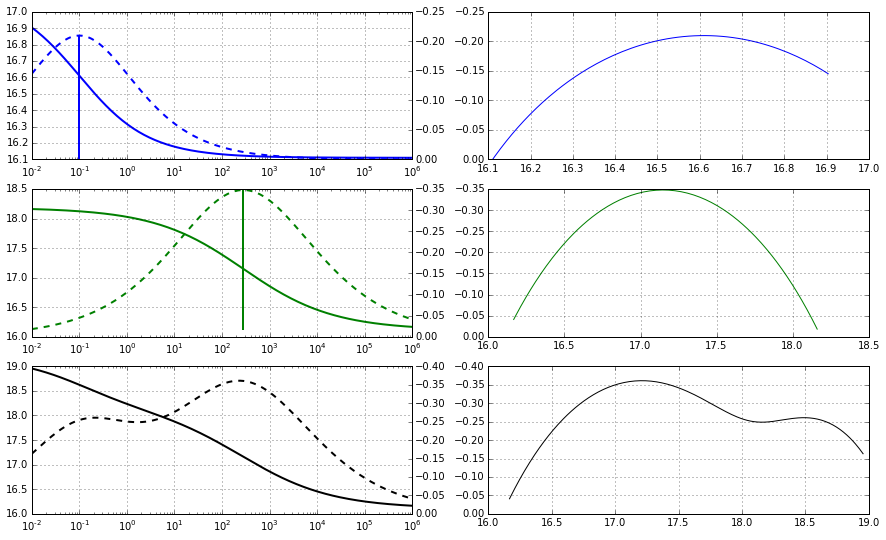

In [52]:
TKCColeCole(frequency, "K1P-0807", data_active)

PK K1P-0825
Rinf =  29.34
Chargeability =  0.913295602388
Taum =  10.0068773804
Taul =  0.000415849687789


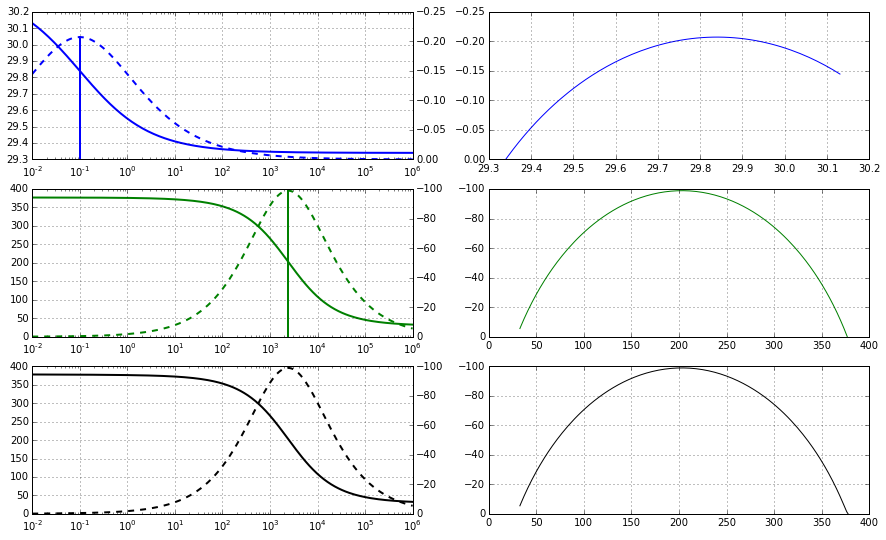

In [54]:
TKCColeCole(frequency, "K1P-0825", data_active)

In [55]:
data_active[data_active['Facies']=='XVK']

,0LabID (PCG),Facies,Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Sat Geometric Dens [g/cc],Chargeability [ms],...,Rm,Qm,Pm,Rl,Ql,Pl,Re,Qe,Pe-f,Pe-i
43,NT01222,XVK,K2P-0017,64.332627,-109.816663,174.1,0.000582,17.317279,2.258028,0.5527,...,1,1.262,0.5,302,5.039e-06,0.6464,10000000000,0.005847,0.3518,0.7189
45,NT01223,XVK,K2P-0020,64.332627,-109.816663,204.5,0.000636,31.009713,2.287620,0.3989,...,1,1.262,0.5,582.8,3.038e-06,0.6517,10000000000,0.003093,0.2073,-2.149
47,NT01224,XVK,K2P-0024,64.332627,-109.816663,235.0,0.000951,56.755824,1.976504,0.4986,...,1,1.262,0.5,1193,3.057e-06,0.5644,10000000000,0.00097,0.1622,-2.037
49,NT01225,XVK,K2P-0031,64.332627,-109.816663,298.7,0.000287,15.608231,2.218582,1.283,...,1,1.262,0.5,404.3,4.406e-06,0.6611,10000000000,0.005015,0.1692,-2.215
55,NT01228,XVK,K2P-0077,NaN,NaN,117.4,0.001884,77.892755,2.416544,0.3708,...,1,1.262,0.5,689.7,1.121e-05,0.5675,10000000000,0.001363,0.66,-2.347
57,NT01229,XVK,K2P-0147,64.332107,-109.815671,169.7,0.000851,15.092644,2.005562,1.919,...,1,1.262,0.5,409.2,4.285e-06,0.6811,10000000000,0.006881,0.2626,0.6353
59,NT01230,XVK,K2P-0157,64.332107,-109.815671,265.9,0.001072,81.146257,1.562988,0.5288,...,1,1.262,0.5,1715,1.801e-06,0.5704,10000000000,0.002796,0.1696,0.6351
60,NT01230,XVK,K2P-0157,64.332107,-109.815671,265.9,0.001110,49.144266,1.747999,0.6389,...,1,1.262,0.5,1008,4.69e-06,0.5254,10000000000,0.008176,0.167,0.6575


XVK K2P-0017
Rinf =  14.04
Chargeability =  0.942076705391
Taum =  10.0068773804
Taul =  0.000274911963031


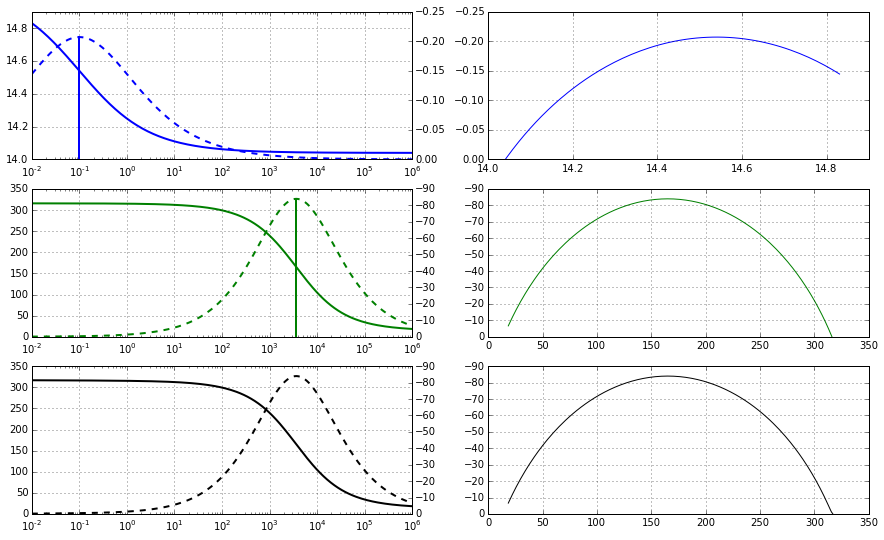

In [56]:
TKCColeCole(frequency, "K2P-0017", data_active)

XVK K2P-0020
Rinf =  90
Chargeability =  0.856765065555
Taum =  10.0068773804
Taul =  0.000376307289625


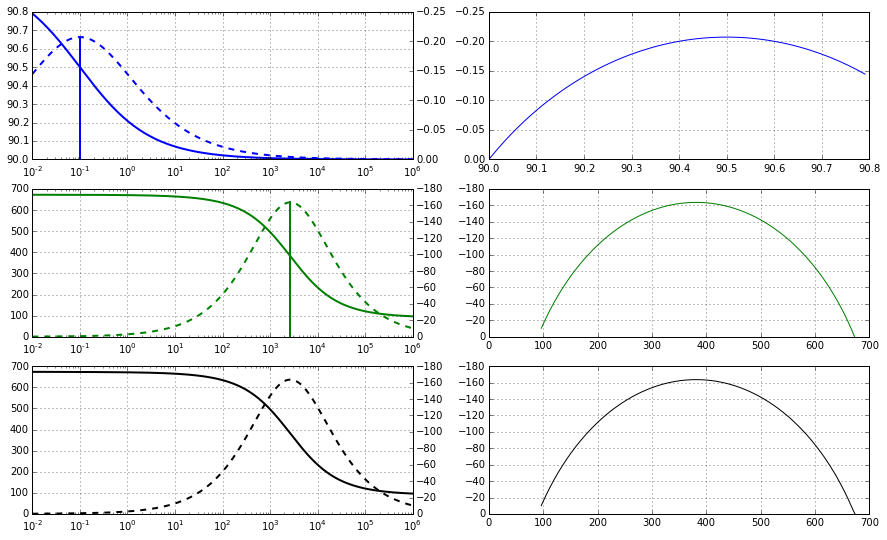

In [57]:
TKCColeCole(frequency, "K2P-0020", data_active)

XVK K2P-0024
Rinf =  530.1
Chargeability =  0.674743460889
Taum =  10.0068773804
Taul =  0.000300908737249


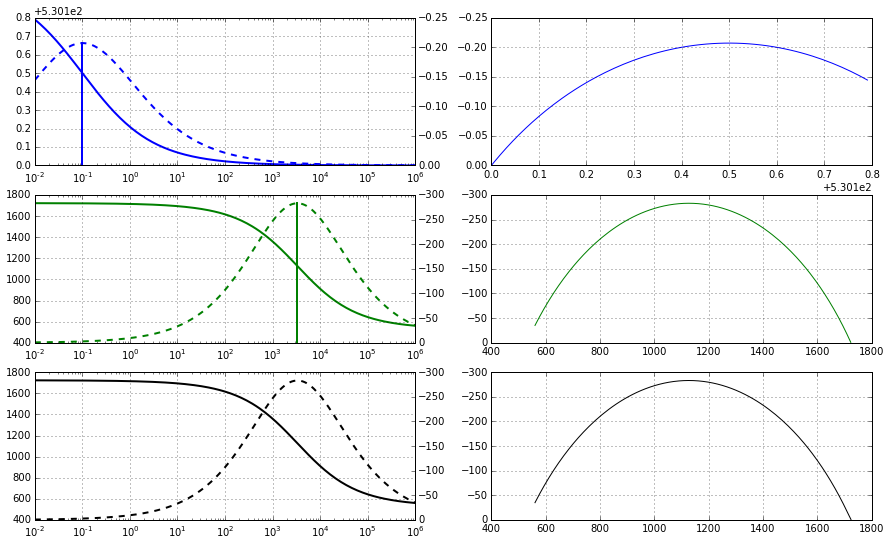

In [58]:
TKCColeCole(frequency, "K2P-0024", data_active)

XVK K2P-0031
Rinf =  8.197
Chargeability =  0.971082747567
Taum =  10.0068773804
Taul =  0.000436091772428


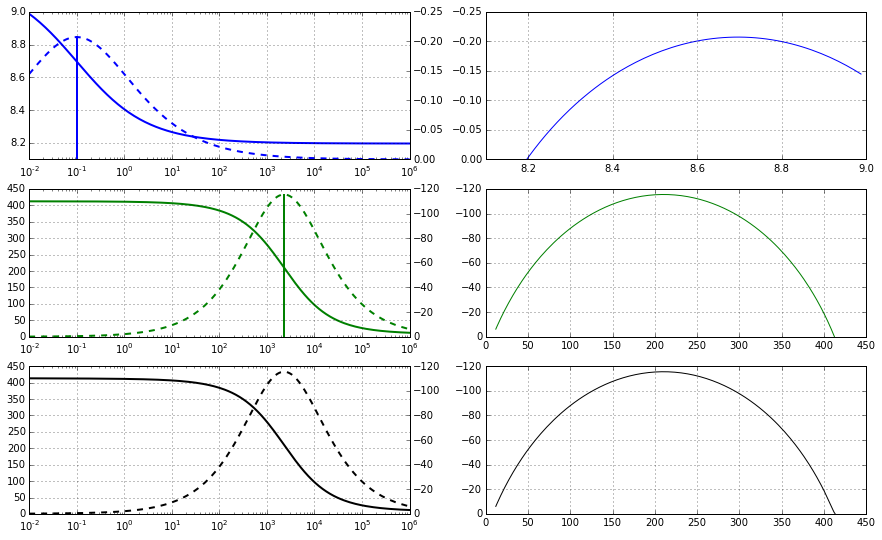

In [59]:
TKCColeCole(frequency, "K2P-0031", data_active)

XVK K2P-0077
Rinf =  189.7
Chargeability =  0.775420131154
Taum =  10.0068773804
Taul =  0.00119415967966


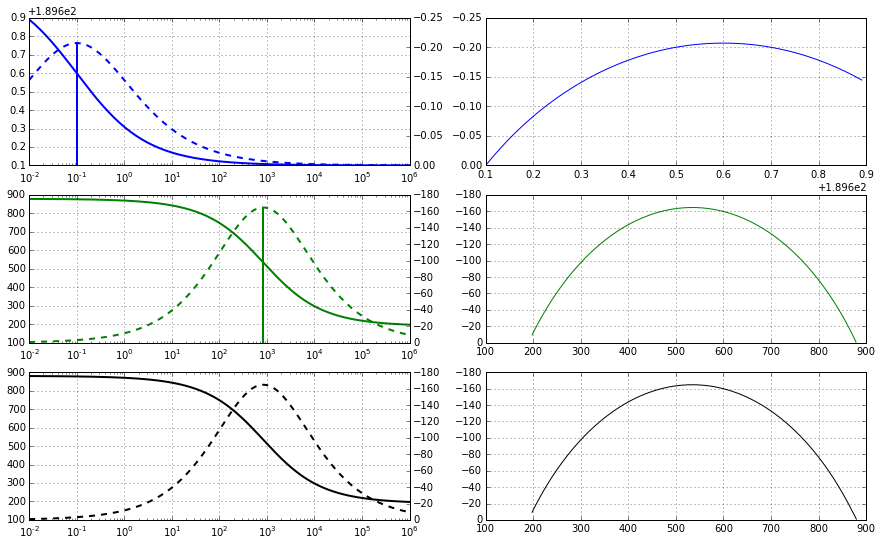

In [60]:
TKCColeCole(frequency, "K2P-0077", data_active)

XVK K2P-0147
Rinf =  2.606
Chargeability =  0.987224545223
Taum =  10.0068773804
Taul =  0.000564439785343


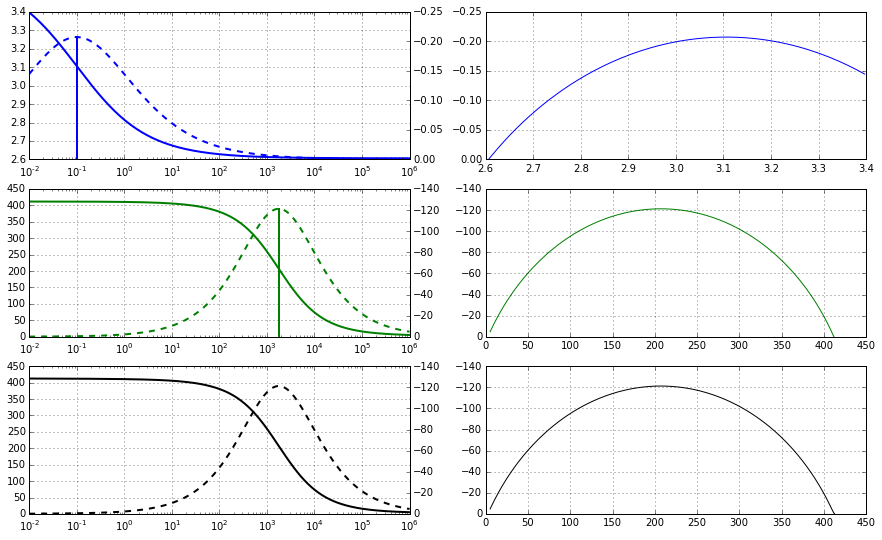

In [61]:
TKCColeCole(frequency, "K2P-0147", data_active)

XVK K2P-0157
Rinf =  3.235
Chargeability =  0.971027149473
Taum =  10.0068773804
Taul =  0.000249671876294


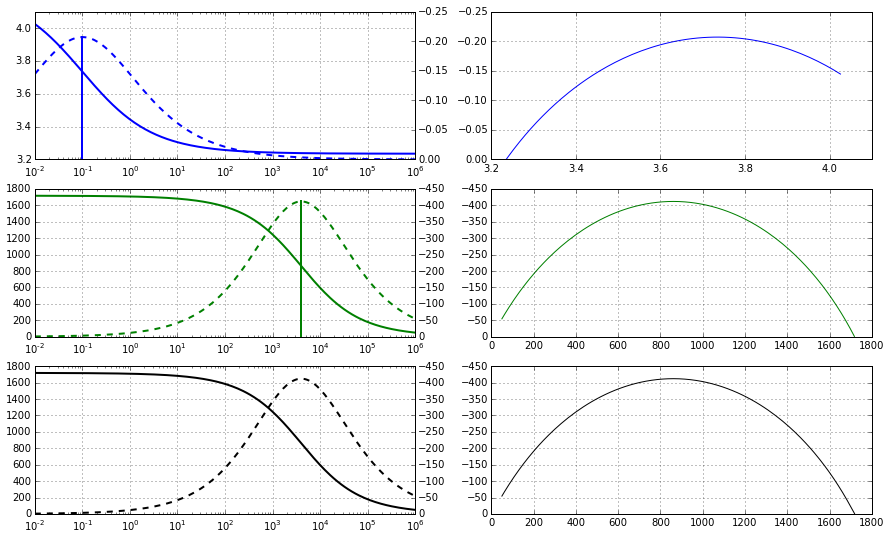

In [62]:
TKCColeCole(frequency, "K2P-0157", data_active)

In [293]:
# Ro	Rh	Qh	Ch	Ph	Fh	pRh	pQh	pCh	Rm	Qm	Cm	Pm	Fm	pRm	pQm	pCm	Rl	Ql	Cl	Pl	Fl	pRl	pQl	pCl	Re	Qe	Pe-f	Pe-i
svec = ['h', 'm', 'l']
PK = {}
for s in svec:
    datatypeIP = ["Depth (m)", "Resistivity [Ohm.m]", "Rinf", "Ro", "R"+s, "Q"+s, "P"+s, "F"+s, "pR"+s, "pQ"+s, "pC"+s]
#     PK[s]=data.loc[data['Peregrine ID'] == 'K1P-0807'][datatypeIP]
    PK[s]=data.loc[data['Peregrine ID'] == 'K1P-0825'][datatypeIP]

In [294]:
PK['l']

,Depth (m),Resistivity [Ohm.m],Rinf,Ro,Rl,Ql,Pl,Fl,pRl,pQl,pCl
33,157,20.391961,29.34,941.1,347.6,5.092e-06,0.6585,2406,1607,6.947e-07,2.596e-08
34,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
PK['m']

,Depth (m),Resistivity [Ohm.m],Rinf,Ro,Rm,Qm,Pm,Fm,pRm,pQm,pCm
33,157,20.391961,29.34,941.1,1,1.262,0.5,0.1,351600,3.582e-06,4.519e-06
34,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
PK['h']

,Depth (m),Resistivity [Ohm.m],Rinf,Ro,Rh,Qh,Ph,Fh,pRh,pQh,pCh
33,157,20.391961,29.34,941.1,563.1,9.363e-10,0.8781,2245000,30.87,8.459e-10,1.137e-10
34,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
PK['l'][datatypeIP[4:]].values[0,:]

array([347.6, 5.092e-06, 0.6585, 2406, 1607, 6.947e-07, 2.596e-08], dtype=object)

In [75]:
frequency = np.logspace(-6, 8, 211)

In [83]:
print Pm, Pl
print 1./fpeakm, 1./fpeakl
print rho.real[0], rho.real[-1], m

0.5 0.6585
10.0068773804 0.000415849687789
377.939989993 29.3402870395 0.922367868401


In [67]:
rhoh = CPEfun(Rh, Qh, Ph, frequency)


In [68]:
matplotlib.rcParams.update({'font.size': 14})

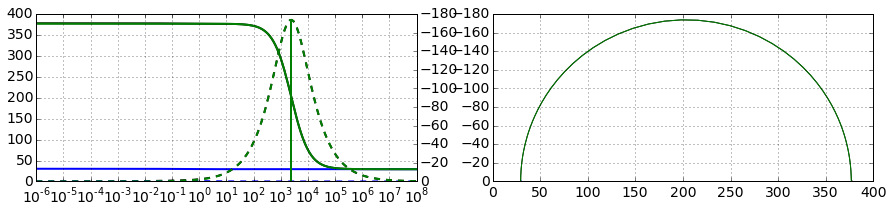

In [156]:
test = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["Facies", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Sat Geometric Dens [g/cc]"]]

In [157]:
test[test["Facies"]=="HK"]

,Facies,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Sat Geometric Dens [g/cc]
7,HK,NaN,NaN,135.1,0.013182,10090.413234,2.674294
9,HK,NaN,NaN,163.8,0.006001,2204.463074,2.759935
19,HK,64.326044,-109.812725,122.4,0.001167,47.798493,2.385503
21,HK,64.326044,-109.812725,135.4,0.004224,17612.473012,2.608411
23,HK,64.326044,-109.812725,176.6,0.009333,572.919007,2.644475


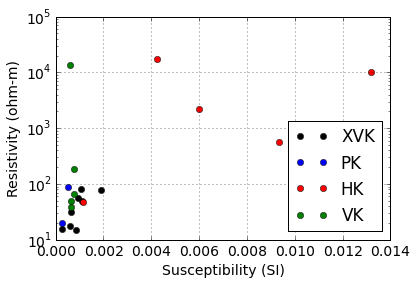

In [147]:
plt.semilogy(test[test["Facies"]=="XVK"]["Mag Susc [SI]"], test[test["Facies"]=="XVK"]["Resistivity [Ohm.m]"], 'ko')
plt.semilogy(test[test["Facies"]=="PK"]["Mag Susc [SI]"], test[test["Facies"]=="PK"]["Resistivity [Ohm.m]"], 'bo')
plt.semilogy(test[test["Facies"]=="HK"]["Mag Susc [SI]"], test[test["Facies"]=="HK"]["Resistivity [Ohm.m]"], 'ro')
plt.semilogy(test[test["Facies"]=="VK"]["Mag Susc [SI]"], test[test["Facies"]=="VK"]["Resistivity [Ohm.m]"], 'go')
plt.grid(True)
plt.legend(("XVK", "PK", "HK", "VK"), loc=4)
plt.xlabel("Susceptibility (SI)")
plt.ylabel("Resistivity (ohm-m)")

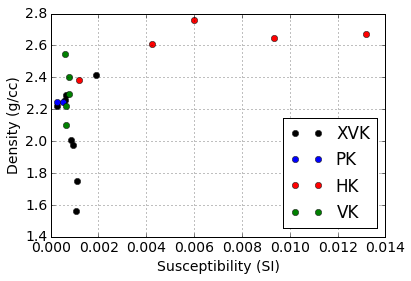

In [150]:
plt.plot(test[test["Facies"]=="XVK"]["Mag Susc [SI]"], test[test["Facies"]=="XVK"]["Sat Geometric Dens [g/cc]"], 'ko')
plt.plot(test[test["Facies"]=="PK"]["Mag Susc [SI]"], test[test["Facies"]=="PK"]["Sat Geometric Dens [g/cc]"], 'bo')
plt.plot(test[test["Facies"]=="HK"]["Mag Susc [SI]"], test[test["Facies"]=="HK"]["Sat Geometric Dens [g/cc]"], 'ro')
plt.plot(test[test["Facies"]=="VK"]["Mag Susc [SI]"], test[test["Facies"]=="VK"]["Sat Geometric Dens [g/cc]"], 'go')
plt.grid(True)
plt.legend(("XVK", "PK", "HK", "VK"), loc=4)
plt.xlabel("Susceptibility (SI)")
plt.ylabel("Density (g/cc)")

In [151]:
test

,Facies,Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Sat Geometric Dens [g/cc]
3,VK,111.6,0.000642,38.183914,2.221620
5,VK,87.5,0.000603,13501.390421,2.545503
7,HK,135.1,0.013182,10090.413234,2.674294
9,HK,163.8,0.006001,2204.463074,2.759935
15,VK,78.0,0.000628,48.916840,2.099668
16,VK,78.0,NaN,49.965791,2.084449
17,VK,85.9,0.000766,187.757995,2.403881
18,VK,85.9,0.000782,66.229958,2.296125
19,HK,122.4,0.001167,47.798493,2.385503
21,HK,135.4,0.004224,17612.473012,2.608411


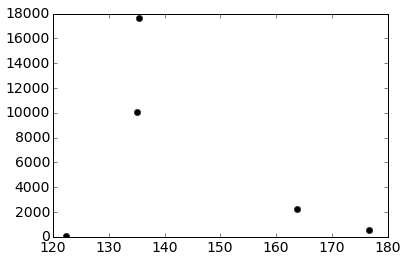

In [115]:
plt.plot(test["Depth (m)"].values, test["Resistivity [Ohm.m]"].values, 'ko')

In [96]:
print(data.loc[np.logical_and(data['Facies'] == 'XVK', data.notnull()['Rinf']==True)][["Depth (m)", "Peregrine ID", "Resistivity [Ohm.m]", "Rinf", "Chargeability [ms]"]])

    Depth (m) Peregrine ID  Resistivity [Ohm.m]   Rinf Chargeability [ms]
43      174.1     K2P-0017            17.317279  14.04             0.5527
45      204.5     K2P-0020            31.009713     90             0.3989
47      235.0     K2P-0024            56.755824  530.1             0.4986
49      298.7     K2P-0031            15.608231  8.197              1.283
55      117.4     K2P-0077            77.892755  189.7             0.3708
57      169.7     K2P-0147            15.092644  2.606              1.919
59      265.9     K2P-0157            81.146257  3.235             0.5288
60      265.9     K2P-0157            49.144266  3.075             0.6389


In [97]:
print(data.loc[np.logical_and(data['Facies'] == 'VK', data.notnull()['Rinf']==True)][["Depth (m)", "Peregrine ID", "Resistivity [Ohm.m]", "Rinf", "Chargeability [ms]"]])

    Depth (m) Peregrine ID  Resistivity [Ohm.m]   Rinf Chargeability [ms]
3       111.6     K1P-0240            38.183914  8.748             0.5439
5        87.5     K1P-0531         13501.390421  361.3             0.6497
15       78.0     K1P-0589            48.916840  2.813             0.2669
16       78.0     K1P-0589            49.965791  11.37                NaN
17       85.9     K1P-0590           187.757995  9.784             0.7856
18       85.9     K1P-0590            66.229958  2.234             0.2139
